In [42]:
import csv

HEADER = None
REFERENCE = []
PERIOD = []
UNCERTAINTY = []
SOURCE = []
START = []
END = []

reader = csv.reader(open('Estimates of the rotation period of Venus.csv'))
skip = True
for row in reader:
    if not HEADER:
        HEADER = row
        continue
    if skip:
        skip = False
        continue
    reference, period, uncertainty, source, start, end = row[:6]
    REFERENCE.append(reference)
    PERIOD.append(float(period))
    UNCERTAINTY.append(float(uncertainty))
    SOURCE.append(source)
    START.append(float(start))
    END.append(float(end))

Text(0.5, 0, 'year of observation data')

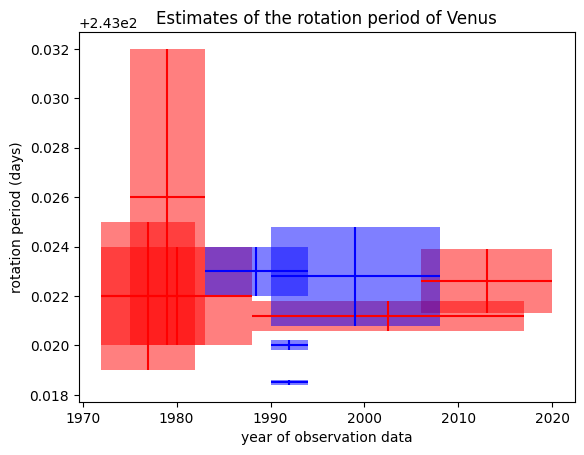

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

# Create figure and axes
fig, ax = plt.subplots(1)

p_a = np.array(PERIOD)
u_a = np.array(UNCERTAINTY)
s_a = np.array(START)
e_a = np.array(END)
d_a = e_a - s_a
fc = []
for source in SOURCE:
    if 'Earth' in source or 'Goldstone' in source: fc.append('r')
    else: fc.append('b')
boxes = [Rectangle((s, p - u), e - s, 2 * u) for p, u, s, e in zip(PERIOD, UNCERTAINTY, START, END)]
patches = PatchCollection(boxes, facecolor=fc, alpha=0.5, edgecolor=None)
ax.add_collection(patches)
artists = ax.errorbar(s_a + d_a / 2, p_a, xerr=d_a / 2, yerr=u_a, fmt='none', ecolor=fc)
ax.set_title('Estimates of the rotation period of Venus')
ax.set_ylabel('rotation period (days)')
ax.set_xlabel('year of observation data')

PERIOD = [
    243.021, # 1988 to 2001
    243.0209, # 1988 to 2015
    243.0208, # 1988 to 2017
    243.0207, # 1988 to 2020
]
UNCERTAINTY = [
    0.001,
    0.0003,
    0.0003,
    0.0003,
]
START = [
    1988,
    1988,
    1988,
    1988,
]
START = [
    2001,
    2015,
    2017,
    2020,
]

boxes = [Rectangle((s, p - u), e - s, 2 * u) for p, u, s, e in zip(PERIOD, UNCERTAINTY, START, END)]
patches = PatchCollection(boxes, facecolor='g', alpha=0.5, edgecolor=None)
ax.add_collection(patches)


